In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np



Bad key "text.kerning_factor" on line 4 in
/home/karan/anaconda3/envs/pneumothorax/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [210]:
image = mpimg.imread('test.jpg')


In [211]:
print('This image is: ', type(image), 'with dimensions:', image.shape)


This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


## Color Selection


In [212]:
ysize = image.shape[0]
xsize = image.shape[1]

color_select = np.copy(image)


In [213]:
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]


In [214]:
color_thresholds = (image[:, :, 0] < rgb_threshold[0] | (
    image[:, :, 1] < rgb_threshold[1]) | (image[:, :, 2] < rgb_threshold[2]))


In [215]:
color_thresholds.shape


(540, 960)

In [216]:
image[0].shape


(960, 3)

In [217]:
color_select[color_thresholds] = [0, 0, 0]


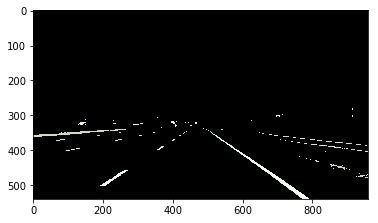

In [218]:
plt.imshow(color_select)
plt.show()


## Region of Interest


In [219]:
ysize = image.shape[0]
xsize = image.shape[1]
resion_select = np.copy(image)


In [220]:
resion_select.shape


(540, 960, 3)

In [221]:
left_bottom = [120, 539]
right_bottom = [800, 539]
apex = [470, 300]


In [222]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)


In [223]:
fit_left


array([ -0.68285714, 620.94285714])

In [224]:
fit_right = np.polyfit(
    (right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
print(fit_right)


[  0.72424242 -40.39393939]


In [225]:
fit_bottom = np.polyfit(
    (left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
print(fit_bottom)


[1.62357864e-16 5.39000000e+02]


In [226]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))


In [227]:
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
    (YY > (XX*fit_right[0] + fit_right[1])) & \
    (YY < (XX*fit_bottom[0] + fit_bottom[1]))


In [228]:
resion_select[region_thresholds] = [255, 0, 0]


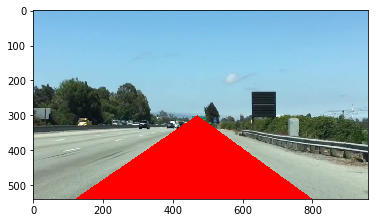

In [229]:
plt.imshow(resion_select)
plt.show()


## Color and Region Combined


In [230]:
color_select = np.copy(image)
line_image = np.copy(image)


In [231]:
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]


In [232]:
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]


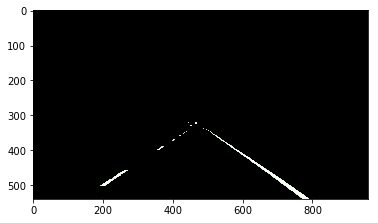

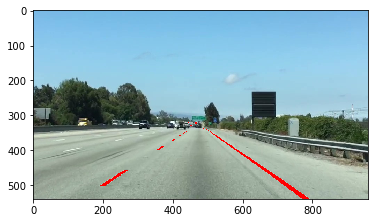

In [233]:
plt.imshow(color_select)
plt.show()
plt.imshow(line_image)
plt.show()


## Canney Edge Detection


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


In [29]:
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


In [30]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)


In [31]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)


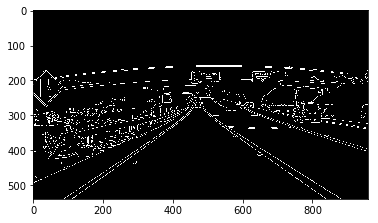

In [32]:
plt.imshow(edges, cmap='Greys_r')
plt.show()


## Hough Transform


In [33]:
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image)*0


In [48]:
lines = cv2.HoughLinesP(edges, rho, theta, threshold,
                        np.array([]), min_line_length, max_line_gap)


In [49]:
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)


In [50]:
color_edges = np.dstack((edges, edges, edges))


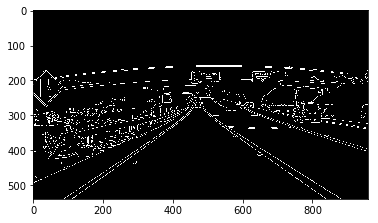

In [51]:
plt.imshow(color_edges)
plt.show()


In [52]:
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)


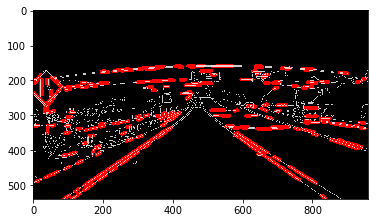

In [53]:
plt.imshow(combo)
plt.show()


In [41]:
imshape = image.shape


In [71]:
vertices = np.array([[(0, imshape[0]), (450, 290), (490, 290),
                    (imshape[1], imshape[0])]], dtype=np.int32)


In [72]:
mask = np.zeros_like(edges)
ignore_mask_color = 255
cv2.fillPoly(mask, vertices, ignore_mask_color)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [73]:
masked_edges = cv2.bitwise_and(edges, mask)

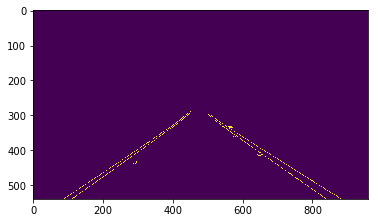

In [74]:
plt.imshow(masked_edges)
plt.show()

In [75]:
rho = 1
theta = np.pi/180
threshold = 15
min_line_length = 40
max_line_gap = 20
line_image = np.copy(image)*0

In [76]:
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold,
                        np.array([]), min_line_length, max_line_gap)


In [77]:
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2,y2), (255,0,0), 10)

In [78]:
color_edges = np.dstack((edges, edges, edges))


In [79]:
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)

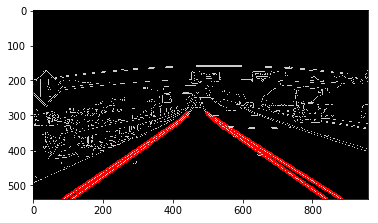

In [80]:
plt.imshow(lines_edges)

In [1]:
import numpy as np

In [12]:
np.polyfit((2,10,3),(1,100,-1),0)

array([33.33333333])

In [10]:
100*2.05-10*12.26 + 17.32

99.71999999999997

In [22]:
np.meshgrid([1,2],[3,4])

[array([[1, 2],
        [1, 2]]),
 array([[3, 3],
        [4, 4]])]